# Bibliotecas

In [18]:
import pandas as pd
import plotly
from prophet import Prophet
import matplotlib.pyplot as plt

# Data load

In [4]:
df = pd.read_parquet("data/raw/imp_instrumentacao.parquet")

# processamento

## features iniciais

In [6]:
df['ds'] = pd.to_datetime(df['CO_ANO'].astype(str)+ "-" + df['CO_MES'].astype(str)+ "-01")

### Agrupamento em formato de serie temporal

In [8]:
df_ts = df.groupby("ds", as_index=False).aggregate({"KG_LIQUIDO": "sum"})

### rename para prophet format

In [10]:
ts_prophet = df_ts.rename(columns={"KG_LIQUIDO": "y"})

### instancia do modelo

In [14]:
model = Prophet()
model.fit(ts_prophet)

16:57:38 - cmdstanpy - INFO - Chain [1] start processing
16:57:38 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=12, freq="MS")

## Previsoes

In [16]:
forecast = model.predict(future)

# Graficos Basicos

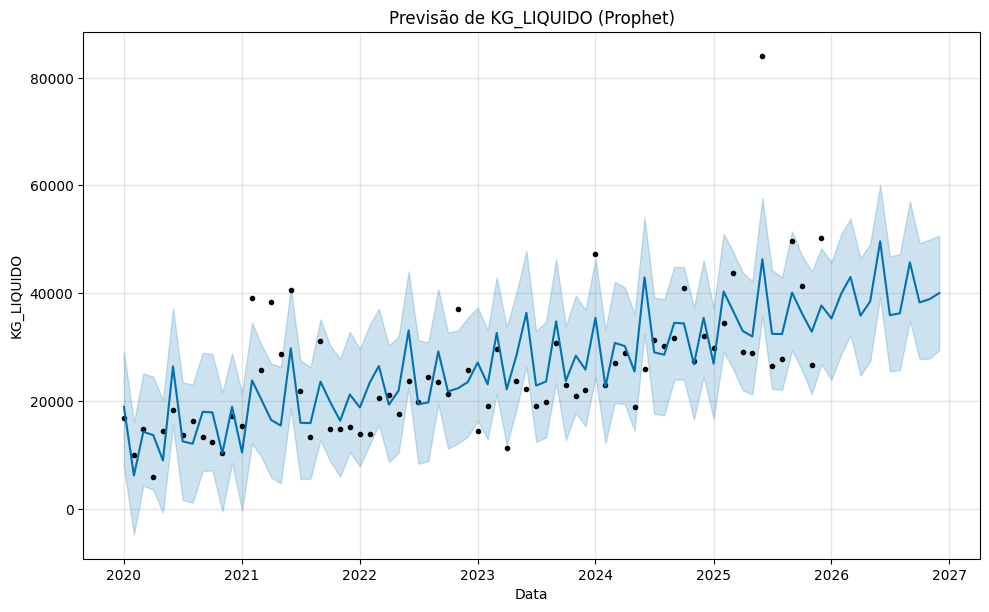

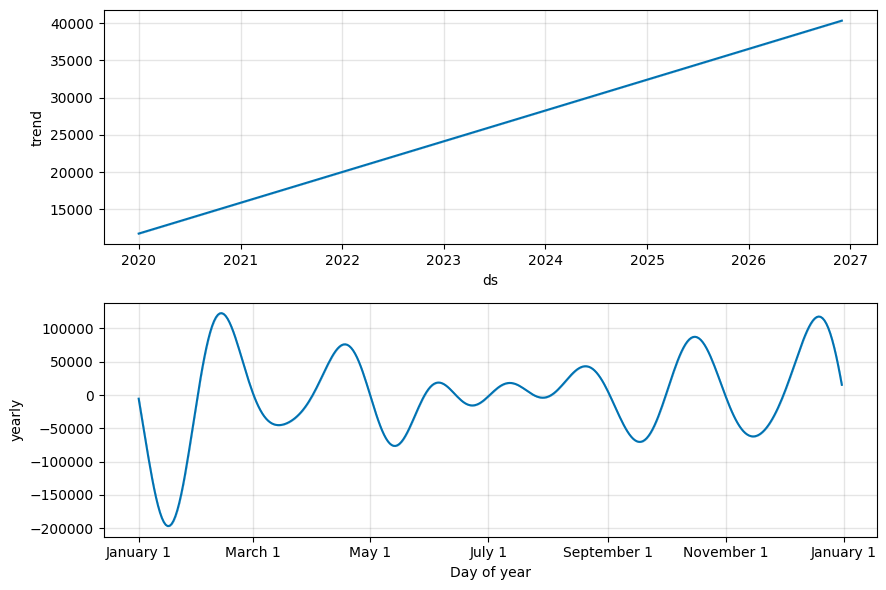

           ds          yhat    yhat_lower    yhat_upper
72 2026-01-01  35314.946880  23939.796402  45738.665595
73 2026-02-01  39996.535612  28762.640949  51079.250743
74 2026-03-01  43015.464135  32257.806314  53846.639860
75 2026-04-01  35839.151205  24717.041904  46531.085980
76 2026-05-01  38459.474346  27369.570253  49163.973958
77 2026-06-01  49631.199542  39254.943267  60116.786138
78 2026-07-01  35926.393492  25541.412439  46836.984327
79 2026-08-01  36269.758428  25705.177916  47266.159316
80 2026-09-01  45731.168285  34822.364381  57095.620484
81 2026-10-01  38289.994066  27777.854924  49255.612042
82 2026-11-01  38893.785434  27880.155582  49965.153270
83 2026-12-01  40027.317949  29446.210192  50695.635321


In [24]:
fig1 = model.plot(forecast)
plt.title("Previsão de KG_LIQUIDO (Prophet)")
plt.xlabel("Data")
plt.ylabel("KG_LIQUIDO")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12))


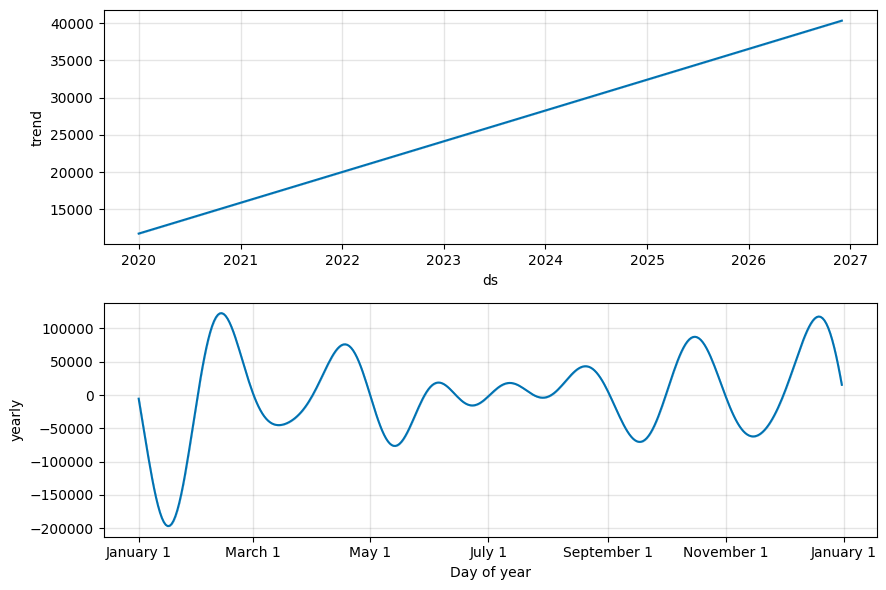

,ds,yhat,yhat_lower,yhat_upper
72,2026-01-01,35314.946880,23939.796402,45738.665595
73,2026-02-01,39996.535612,28762.640949,51079.250743
74,2026-03-01,43015.464135,32257.806314,53846.639860
75,2026-04-01,35839.151205,24717.041904,46531.085980
76,2026-05-01,38459.474346,27369.570253,49163.973958
77,2026-06-01,49631.199542,39254.943267,60116.786138
78,2026-07-01,35926.393492,25541.412439,46836.984327
79,2026-08-01,36269.758428,25705.177916,47266.159316
80,2026-09-01,45731.168285,34822.364381,57095.620484
81,2026-10-01,38289.994066,27777.854924,49255.612042
